# Question 2

In this part, you are required to perform PCA on images of handwritten digits. In .zip,
we provide mnist digists of 0,1 and 2, which is a subset of the LeCun’s MNIST dataset containing
images of handwritten digits 0, 1, 2. We already provide the code to read images into a
matrix $X$. Each row of the matrix X represents an image. You are required to ﬁnish the following task.

1. Plot the Eigen Images.

Perform PCA on the matrix X. You can use PCA implemented by yourself (in Q1) or the one
provided in scikit-learn (aka sklearn). Plot eigenvectors corresponding to the largest 10 eigenvalues.
Combine and save ﬁgures in a single image ﬁle eigenimages.jpg. We also provide
the sample code for presenting vectors as an image. For PCA on images data, you can
read the example in scikit-learn official user guide.

2. Plot POV.

Plot POV v.s. the order of eigenvalues as in question 1. Save ﬁgure in ﬁle
digit_pov.jpg. You also need to answer the questions mentioned below. For your reference, sample plots and figures are included at the end.

In [2]:
# Do not change this cell
import os.path
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Do not change this cell
def load_data(digits = [0], num = 200):
    '''
    Loads all of the images into a data-array.

    The training data has 5000 images per digit,
    but loading that many images from the disk may take a while.  So, you can
    just use a subset of them, say 200 for training (otherwise it will take a
    long time to complete.

    Note that each image as a 28x28 grayscale image, loaded as an array and
    then reshaped into a single row-vector.

    Use the function display(row-vector) to visualize an image.

    '''
    totalsize = 0
    for digit in digits:
        totalsize += min([len(next(os.walk('train%d' % digit))[2]), num])
    print('We will load %d images' % totalsize)
    X = np.zeros((totalsize, 784), dtype = np.uint8)   #784=28*28
    for index in range(0, len(digits)):
        digit = digits[index]
        print('\nReading images of digit %d' % digit)
        for i in range(num):
            pth = os.path.join('train%d' % digit,'%05d.pgm' % i)
            image = imageio.imread(pth).reshape((1, 784))
            X[i + index * num, :] = image
        print('\n')
    return X

def plot_mean_image(X, digits = [0]):
    ''' example on presenting vector as an image
    '''
    plt.close('all')
    meanrow = X.mean(0)
    # present the row vector as an image
    plt.imshow(np.reshape(meanrow,(28,28)))
    plt.title('Mean image of digit ' + str(digits))
    plt.gray(), plt.xticks(()), plt.yticks(()), plt.show()



# Complete the following code [10 marks]

We will load 1500 images

Reading images of digit 0



Reading images of digit 1



Reading images of digit 2




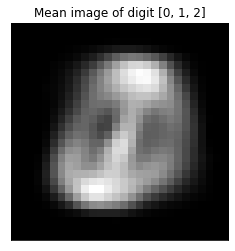

Number of dimensions needed: 113


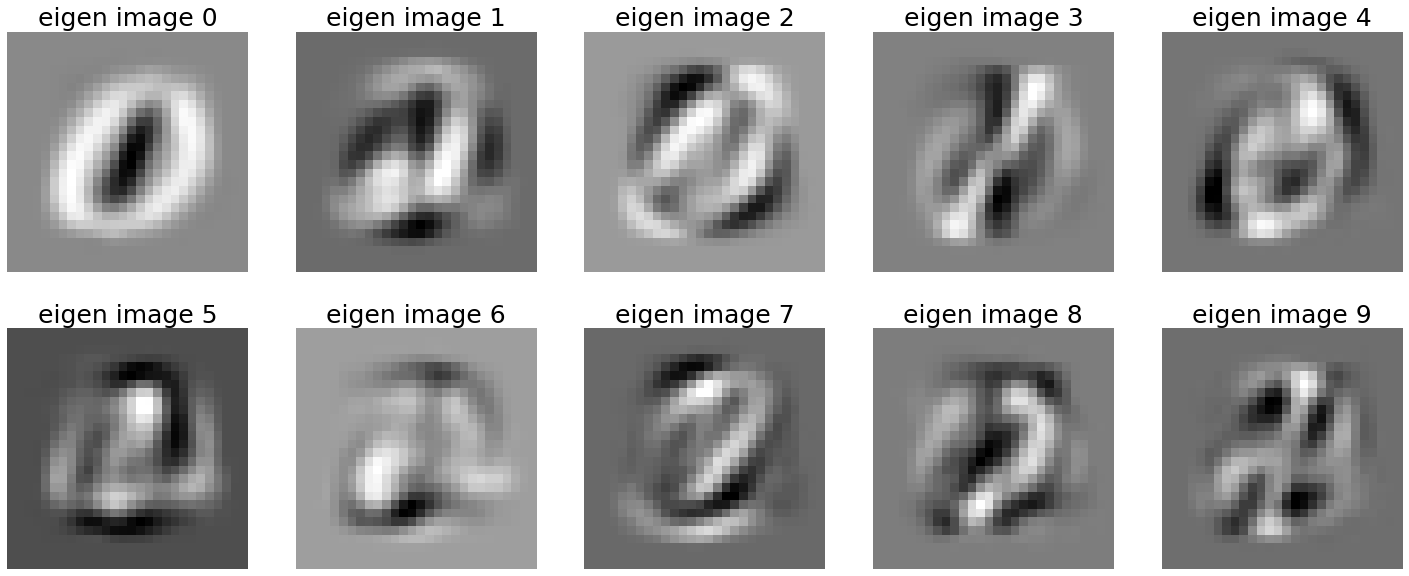

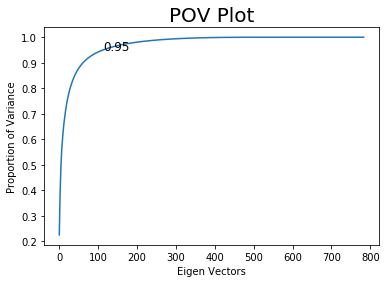

In [75]:
def main():
    digits = [0, 1, 2]
    # load handwritten images of digit 0, 1, 2 into a matrix X
    # for each digit, we just use 500 images
    # each row of matrix X represents an image
    X = load_data(digits, 500)
    # plot the mean image of these images!
    # you will learn how to represent a row vector as an image in this function
    plot_mean_image(X, digits)

    ####################################################################
    # plot the eigen images, eigenvalue v.s. the order of eigenvalue, POV
    # v.s. the order of eigenvalue
    # you need to
    #   1. do the PCA on matrix X;
    #
    #   2. plot the eigenimages (reshape the vector to 28*28 matrix then use
    #   the function ``imshow'' in pyplot), save the images of eigenvectors
    #   which correspond to largest 10 eigenvalues. Save them in a single file
    #   ``eigenimages.jpg''.
    #
    #   3. plot the POV (the Portion of variance explained v.s. the number of
    #   components we retain), save the figure in file ``digit_pov.jpg'' Mark
    #   on the plot where proportion of the variance is 95%.
    #
    #   4. report how many dimensions are need to preserve 0.95 POV (using code), describe
    #   your answers and your undestanding of the results in the plain text
    #   in a cell below. Describe what proportion of the variance means
    #   with respect to the eigen vectors from the POV plot.
    #
    #   5. remember to submit file ``eigenimages.jpg'', ``digit_pov.jpg'',
    #   
    # YOUR CODE HERE!
    pca=PCA()
    pca.fit(X)
    transformed= pca.transform(X)
    eigVals=pca.explained_variance_
    eigVecs=pca.components_[0:10,:]
    fig=plt.figure()
    fig.set_size_inches(25,10)
    for i in range(len(eigVecs)):
      plt.subplot(2,5,i+1)
      plt.title("eigen image %s"%str(i), fontsize=25)
      plt.imshow(np.reshape(eigVecs[i],(28,28)))
      plt.axis('off')

    

    fig.savefig("eigenimages.jpg")
    pov=pca.explained_variance_ratio_.cumsum()
    fig2=plt.figure()
    index= [i for i,x in enumerate(pov) if x<0.96 and x>0.95]
    #We Only need first index where cumSum gets to 0.95 thats the number of Principle Components we need.
    print("Number of dimensions needed: %s"%str(index[0]+1))
    #######################################################
    
    plt.plot(np.array(range(0,len(pca.components_))), pov)
    plt.title("POV Plot", fontsize=20)
    plt.xlabel("Eigen Vectors")
    plt.ylabel("Proportion of Variance")
    xy=(index[0], pov[index[0]])
    plt.annotate("0.95", xy, fontsize=12)
    fig2.savefig("digit_pov.jpg")
    ####################################################################


if __name__ == '__main__':
    main()


# Answer the following questions from the code above. [15 marks]

**1. How many dimensions are need to preserve 0.95 POV? Use the code above to check this. What's the signifiance of 0.95 POV and how it can be used for dimensionality reduction?**

**2. Explain the POV vs Eigenvectors plot.**

**3. Is it true that highly correlated attributes/pixel values have lower variance? Share your thoughts.**

<h3>1)</h3> 
113. If we take a look at the cummulative POV we found in the code above, it gave index: 112, so indices start from 0 hence we would need 113 principle components to retain 0.95 POV. We can also verify this by running PCA again by setting percentage threshold to be 0.95. The significance of this 0.95 POV is that it tells us how many principle components we need and looking at our current scenario, we only need 113 PCs to preserve it. There are 784 dimensions in our image, we can simply keep the top 113 PCs and still retain most of the useful information about our image and significantly reduce its dimensions, good for image compression. 

<h3>2)</h3>
This plot shows us which Principle components (which we sort in descending order) contribute the most to the variance in the data. Using the cummulative POV plot we can tell how many PCs contribute to a certain (cummulative POV) value from which we can derive the number of PCs to use for dimentionality reduction like done above. The plot we have shows that we only need a few eigen vectors to retain the bulk of the information about the image. Our plot converges early to a high value which is good enough to describe and further analyze our data. 


<h3>3)</h3> 
Yes. When two variables are highly correlated, they move together in the same direction and have similar values so relative to each other their variance is quite low. Therefore, when correlation increases, variance decreases because both variables are similar. 

We also can see it from the corr formula corr(x,y)= cov(x,y)/(std(x)*std(y)) where var(x)=sqrt(std(x)) so we can see it from a mathematical point of view as well that when corr increases the value in the denominator, the var should decrease

# Sample Graphs

### Note: This is just a sample, so do not try to make exact replica. Use your own imagination.

<img src="sample_imgs/digit_pov.jpg" alt="Alt text that describes the graphic" title="Title text" />

<img src="sample_imgs/eigenimages.jpg" alt="Alt text that describes the graphic" title="Title text" />